# Сессия 1
---

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

### 1.1 Подготовка данных

Необходимо выполнить подготовку данных для дальнейшего  анализа и построения прогнозных моделей. Следует выполнить загрузку всех необходимых данных по пассажирским перевозкам. Требуется выполнить объединение двух частей набора данных по перевозкам.

In [31]:
first_part = pd.read_excel("train_first_part.xlsx")
second_part = pd.read_json("train_second_part.json")
weather = pd.read_csv("weather.csv")

In [32]:
first_part.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [33]:
second_part.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id3758523,2,6/2/16 2:30,6/2/16 2:50,6,-73.991272,40.697350,-73.989700,40.767689,N,1210
1,id1849264,2,1/6/16 18:12,1/6/16 18:30,5,-73.988281,40.723385,-74.005089,40.749908,N,1077
2,id3457947,1,2/28/16 12:09,2/28/16 12:11,1,-73.968872,40.767120,-73.962051,40.776581,N,135
3,id2181863,2,6/26/16 16:22,6/26/16 16:29,1,-73.982330,40.775517,-73.965622,40.804626,N,415
4,id1445143,1,5/12/16 22:43,5/12/16 22:57,2,-73.966698,40.764000,-73.938751,40.766308,N,810


Объединяем выборки

In [34]:
df = pd.concat([first_part, second_part]).drop_duplicates("id").drop("id", axis = 1)

In [35]:
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
8582,1,4/6/16 14:16,4/6/16 14:20,1,-73.973015,40.760948,-73.976387,40.755604,N,207
8583,2,3/24/16 1:26,3/24/16 1:38,1,-73.985550,40.727257,-73.957039,40.712387,N,740
8584,1,2/23/16 16:38,2/23/16 16:48,1,-73.972038,40.750202,-73.998360,40.733360,N,605
8585,1,5/24/16 7:20,5/24/16 7:25,1,-73.993332,40.724342,-74.004250,40.707470,N,287


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 8586
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1048575 non-null  int64  
 1   pickup_datetime     1048575 non-null  object 
 2   dropoff_datetime    1048575 non-null  object 
 3   passenger_count     1048575 non-null  int64  
 4   pickup_longitude    1048575 non-null  float64
 5   pickup_latitude     1048575 non-null  float64
 6   dropoff_longitude   1048575 non-null  float64
 7   dropoff_latitude    1048575 non-null  float64
 8   store_and_fwd_flag  1048575 non-null  object 
 9   trip_duration       1048575 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 88.0+ MB


In [37]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 8586
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1048575 non-null  int64         
 1   pickup_datetime     1048575 non-null  datetime64[ns]
 2   dropoff_datetime    1048575 non-null  datetime64[ns]
 3   passenger_count     1048575 non-null  int64         
 4   pickup_longitude    1048575 non-null  float64       
 5   pickup_latitude     1048575 non-null  float64       
 6   dropoff_longitude   1048575 non-null  float64       
 7   dropoff_latitude    1048575 non-null  float64       
 8   store_and_fwd_flag  1048575 non-null  object        
 9   trip_duration       1048575 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 88.0+ MB


### Форматирование данных

<AxesSubplot:>

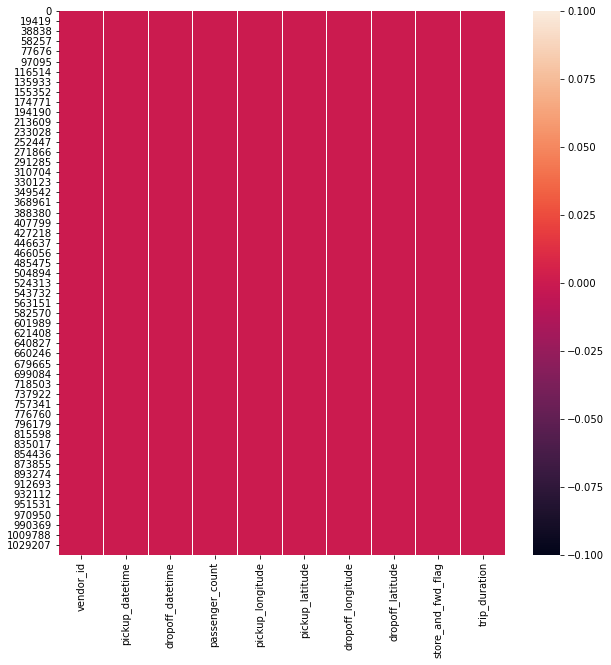

In [38]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.isna())

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 8586
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1048575 non-null  int64         
 1   pickup_datetime     1048575 non-null  datetime64[ns]
 2   dropoff_datetime    1048575 non-null  datetime64[ns]
 3   passenger_count     1048575 non-null  int64         
 4   pickup_longitude    1048575 non-null  float64       
 5   pickup_latitude     1048575 non-null  float64       
 6   dropoff_longitude   1048575 non-null  float64       
 7   dropoff_latitude    1048575 non-null  float64       
 8   store_and_fwd_flag  1048575 non-null  object        
 9   trip_duration       1048575 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 88.0+ MB


In [40]:
df["trip_duration"] = df["trip_duration"].apply(lambda x : x / 60)

In [41]:
df["trip_duration"]

0        7.583333
1       11.050000
2       35.400000
3        7.150000
4        7.250000
          ...    
8582     3.450000
8583    12.333333
8584    10.083333
8585     4.783333
8586    19.483333
Name: trip_duration, Length: 1048575, dtype: float64

In [42]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.534503e+00,1.664382e+00,-7.397342e+01,4.075094e+01,-7.397336e+01,4.075183e+01,1.603575e+01
std,4.988084e-01,1.314261e+00,4.280165e-02,3.381389e-02,4.274282e-02,3.645002e-02,9.755004e+01
min,1.000000e+00,0.000000e+00,-7.854740e+01,3.435970e+01,-7.981798e+01,3.218114e+01,1.666667e-02
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073738e+01,-7.399131e+01,4.073594e+01,6.616667e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075415e+01,-7.397973e+01,4.075455e+01,1.103333e+01
75%,2.000000e+00,2.000000e+00,-7.396731e+01,4.076836e+01,-7.396301e+01,4.076984e+01,1.791667e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,5.877137e+04


<AxesSubplot:xlabel='trip_duration'>

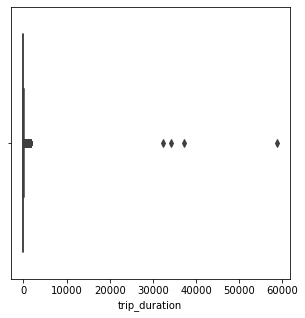

In [43]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (5 , 5))
sns.boxplot(df["trip_duration"])

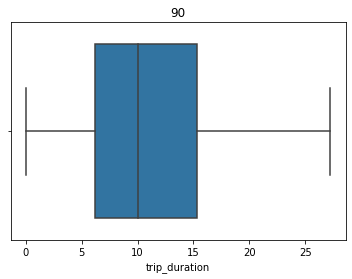

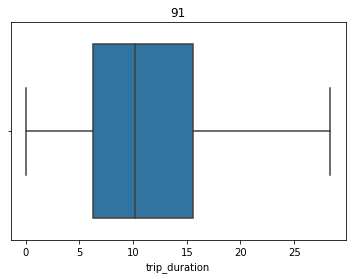

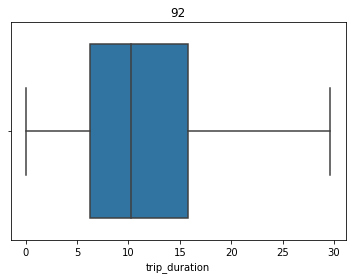

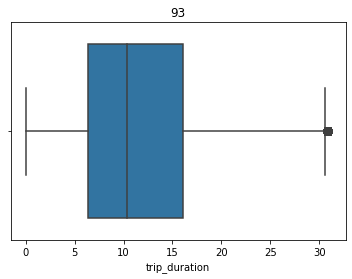

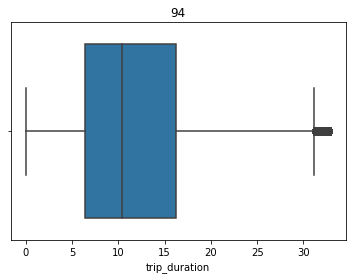

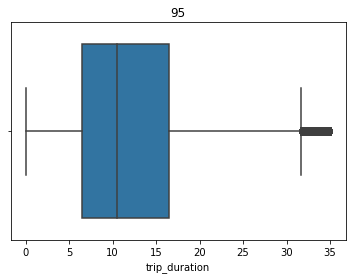

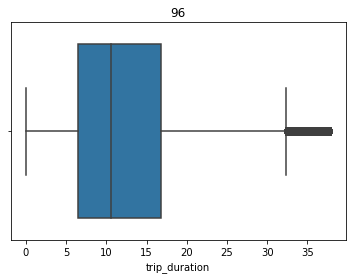

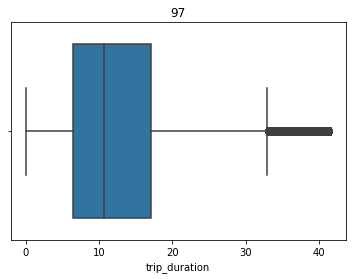

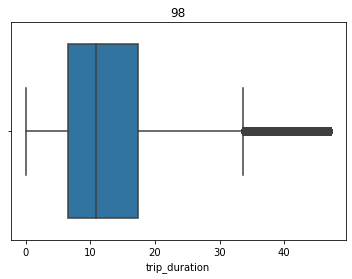

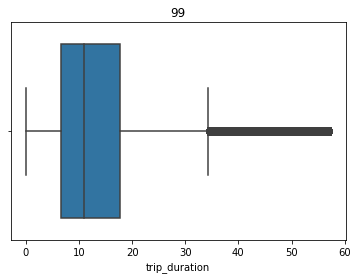

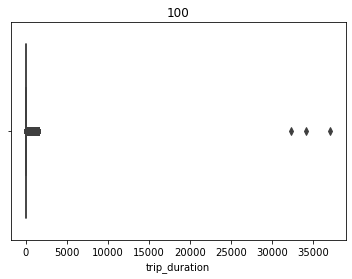

In [44]:
for i in range(90, 101):
    qunt = df["trip_duration"].quantile(i/100)
    df_qunt = df[df["trip_duration"] < qunt]["trip_duration"]
    
    sns.boxplot(df_qunt)
    plt.title(i)
    plt.show()

In [45]:
q_up = df["trip_duration"].quantile(0.93)
df = df[df["trip_duration"] < q_up]

In [46]:
df["store_and_fwd_flag"].value_counts()

N    970191
Y      4929
Name: store_and_fwd_flag, dtype: int64

In [47]:
d_tm = {"N" : 0, "Y" : 1}
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].map(d_tm)
df["store_and_fwd_flag"].value_counts()

0    970191
1      4929
Name: store_and_fwd_flag, dtype: int64

## Форматирование погодных данных

In [49]:
weather.isna().sum()

date                   0
maximum temperature    0
minimum temperature    0
average temperature    0
precipitation          0
snow fall              0
snow depth             0
dtype: int64

In [52]:
for col in ["precipitation", "snow fall", "snow depth"]:
    print(weather[col].unique())
    print("-" * 10)

['0.00' 'T' '1.80' '0.24' '0.05' '0.01' '2.31' '0.73' '0.53' '0.44' '1.01'
 '0.03' '0.30' '1.22' '0.02' '0.14' '0.11' '0.06' '0.29' '0.07' '0.04'
 '0.38' '0.16' '0.09' '0.47' '0.20' '0.61' '0.54' '0.25' '0.18' '1.65'
 '0.40' '0.91' '0.45' '0.22' '0.12' '0.83' '0' '0.49' '0.66' '0.08' '0.62'
 '0.35' '1' '1.09' '1.08' '0.15' '0.32' '0.82' '0.31' '0.5' '0.56' '0.68'
 '0.2' '0.4' '0.23' '0.55' '1.11' '1.41' '1.81' '2.2' '0.19' '0.39']
----------
['0.0' 'T' '0.4' '0.2' '27.3' '2.5' '0.1' '1.4' '0.5' '0' '2.8']
----------
['0' 'T' '6' '22' '19' '17' '9' '4' '2' '1']
----------


In [53]:
for col in ["precipitation", "snow fall", "snow depth"]:
    weather.loc[weather[col] == "T", col] = 0
    weather[col] = weather[col].astype(float)

In [54]:
weather.describe()

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,64.625683,49.806011,57.215847,0.115219,0.098361,0.275956
std,18.041787,16.570747,17.124760,0.309682,1.441631,1.928253
min,15.000000,-1.000000,7.000000,0.000000,0.000000,0.000000
25%,50.000000,37.250000,44.000000,0.000000,0.000000,0.000000
50%,64.500000,48.000000,55.750000,0.000000,0.000000,0.000000
75%,81.000000,65.000000,73.500000,0.040000,0.000000,0.000000
max,96.000000,81.000000,88.500000,2.310000,27.300000,22.000000


In [55]:
for temp in ["maximum temperature", "minimum temperature", "average temperature"]:
    weather[temp] = weather[temp].apply(lambda x : (x - 32)/1.8)

In [56]:
weather.describe()

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,18.125379,9.892228,14.008804,0.115219,0.098361,0.275956
std,10.023215,9.205971,9.513755,0.309682,1.441631,1.928253
min,-9.444444,-18.333333,-13.888889,0.000000,0.000000,0.000000
25%,10.000000,2.916667,6.666667,0.000000,0.000000,0.000000
50%,18.055556,8.888889,13.194444,0.000000,0.000000,0.000000
75%,27.222222,18.333333,23.055556,0.040000,0.000000,0.000000
max,35.555556,27.222222,31.388889,2.310000,27.300000,22.000000


In [57]:
df["date"] = df["pickup_datetime"].apply(lambda x : str(x.day) + "-" + str(x.month) + "-" + str(x.year))
df = df.merge(weather, on = "date").drop(["date", "dropoff_datetime"], axis = 1)
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,7.583333,10.555556,4.444444,7.5,0.29,0.0,0.0
1,1,2016-03-14 14:05:39,1,-73.975090,40.758766,-73.953201,40.765068,0,22.433333,10.555556,4.444444,7.5,0.29,0.0,0.0
2,1,2016-03-14 15:04:38,1,-73.994484,40.745087,-73.998993,40.722710,0,11.583333,10.555556,4.444444,7.5,0.29,0.0,0.0
3,2,2016-03-14 04:24:36,3,-73.944359,40.714489,-73.910530,40.709492,0,12.583333,10.555556,4.444444,7.5,0.29,0.0,0.0
4,2,2016-03-14 14:57:56,1,-73.952881,40.766468,-73.978630,40.761921,0,17.500000,10.555556,4.444444,7.5,0.29,0.0,0.0


# Сохранение данных и вывод о проделанной работе

In [58]:
print("Сохранение данных!")
df.to_csv("c1_result.csv", index = False)
print("Данные сохранены")

Сохранение данных!
Данные сохранены


### Вывод

- Обработаны пропуски во всех данных
- Обработаны выбросы во всех данных
- данные приведены к приемлемому формату
- Объединены данные о всех поездаках и о погоде в том числе